In [ ]:
import os
import cv2 #OpenCV
import numpy as np #Biblioteca Numerica
import matplotlib.pyplot as plt #Visualizaciones

from zipfile import ZipFile
from urllib.request import urlretrieve
from scipy.signal import convolve2d

from IPython.display import Image

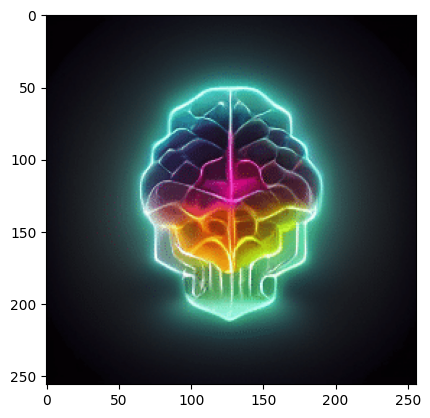

In [ ]:
# Carga una imagen a color..
image = cv2.imread("favicon.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

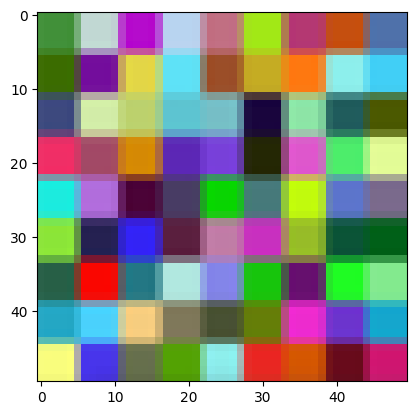

In [ ]:
# Carga una imagen a color..
image2 = cv2.imread("checkerboard_color.png")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

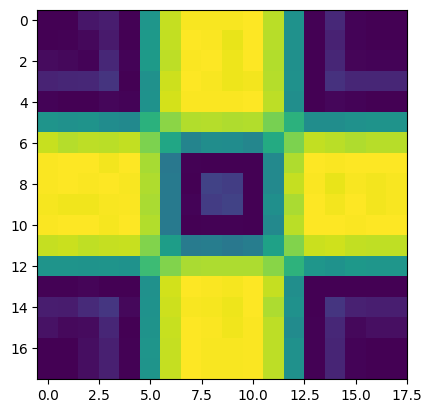

In [ ]:
# Carga una imagen 2D
image3 = cv2.imread("checkerboard_fuzzy_18x18.jpg",0)
plt.imshow(image3)
print(image3)

In [ ]:
# VARIABLES
img = np.copy(image2)
filter0 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
filter1 = np.array([[1/16, 1/8, 1/16],
                   [1/8, 1/4, 1/8],
                   [1/16, 1/8, 1/16]])
filter2 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
filter3 = np.array([[-1, 0, 1, 0],
                    [-1, 0, 1, 0],
                    [-1, 0, 1, 0],
                    [-1, 0, 1, 0]])
stride = 1
padding1 = "zero"
padding2 = "reflected"
padding_size = 1

In [ ]:
# FUNCION DE CONVOLUCION
def convolucion(img, kernel, stride, padding, padding_size):
    h_img, w_img = img.shape
    h_kernel, w_kernel = kernel.shape
    h_output = (h_img - h_kernel) // stride + 1
    w_output = (w_img - w_kernel) // stride + 1
    output = np.zeros((h_output, w_output))
    for i in range(0, h_img - h_kernel + 1, stride):
        for j in range(0, w_img - w_kernel + 1, stride):
            region = img[i:i+h_kernel, j:j+w_kernel]
            output[i // stride, j // stride] = np.sum(region * kernel)

    if padding == "zero":
        output = np.pad(output, padding_size, mode='constant')
    elif padding == "reflected":
        output = cv2.copyMakeBorder(img, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_REFLECT)

    return output

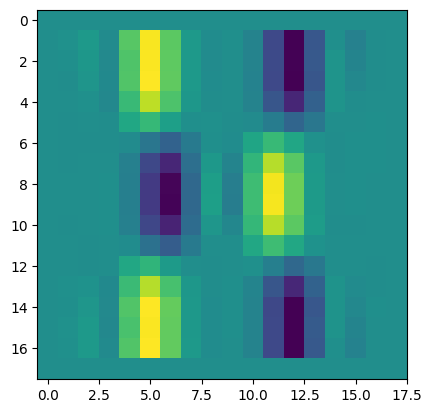

In [ ]:
img_output1 = convolucion(image3, filter2, stride,"zero",1)
plt.imshow(img_output1)

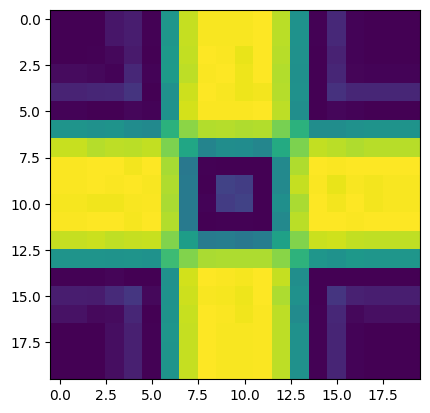

In [ ]:
img_output2 = convolucion(image3, filter3, stride,"reflected",1)
plt.imshow(img_output2)

In [ ]:
# FUNCION POOLING
def pooling(img, size_f, stride, option):
    h_img, w_img = img.shape
    h_kernel, w_kernel = size_f

    h_output = (h_img - h_kernel) // stride + 1
    w_output = (w_img - w_kernel) // stride + 1

    output = np.zeros((h_output, w_output))

    for i in range(0, h_img - h_kernel + 1, stride):
        for j in range(0, w_img - w_kernel + 1, stride):
            region = img[i:i+h_kernel, j:j+w_kernel]
            if option == "max":
                output[i // stride, j // stride] = np.max(region)
            elif option == "average":
                output[i // stride, j // stride] = np.mean(region)

    return output


[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

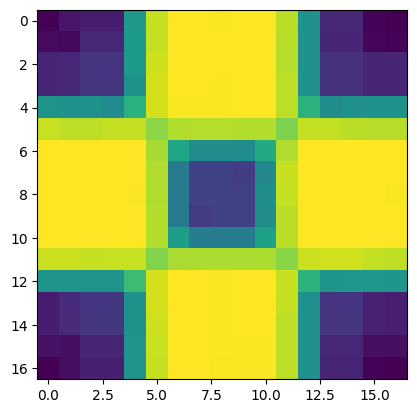

In [ ]:
print(image3)
output = pooling(image3, (2,2), 1, "max")
print(output)
plt.imshow(output)

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

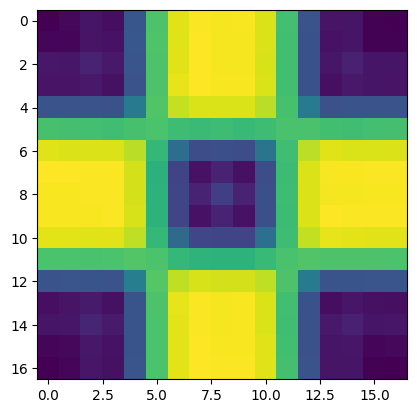

In [ ]:
print(image3)
output = pooling(image3, (2,2), 1, "average")
print(output)
plt.imshow(output)

In [ ]:
def global_average_pooling(img):
    return np.mean(img, axis=(0, 1))

global_pool = global_average_pooling(image3)
print(global_pool)


136.28395061728395
